In [214]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. How are coefficients affected?

### Regularization Parameter (λ) in Ridge Regression

In Ridge Regression, the regularization parameter **λ (lambda)** controls the amount of shrinkage applied to the model coefficients.

- When **λ is small**: The model behaves more like standard linear regression, and coefficients can take larger values.
- When **λ increases**: The penalty on large coefficients becomes stronger, leading to **smaller** coefficient values.
- When **λ is very large**: The coefficients are heavily penalized and **tend toward zero**, which helps prevent overfitting.

> Note: Unlike Lasso Regression, Ridge Regression does not reduce coefficients to exactly zero; it only shrinks them closer to zero.


In [215]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [216]:
data = load_diabetes()

In [217]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['TARGET'] = data.target

In [218]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [219]:
df.shape

(442, 11)

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)

In [221]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [222]:
coefs =[]
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

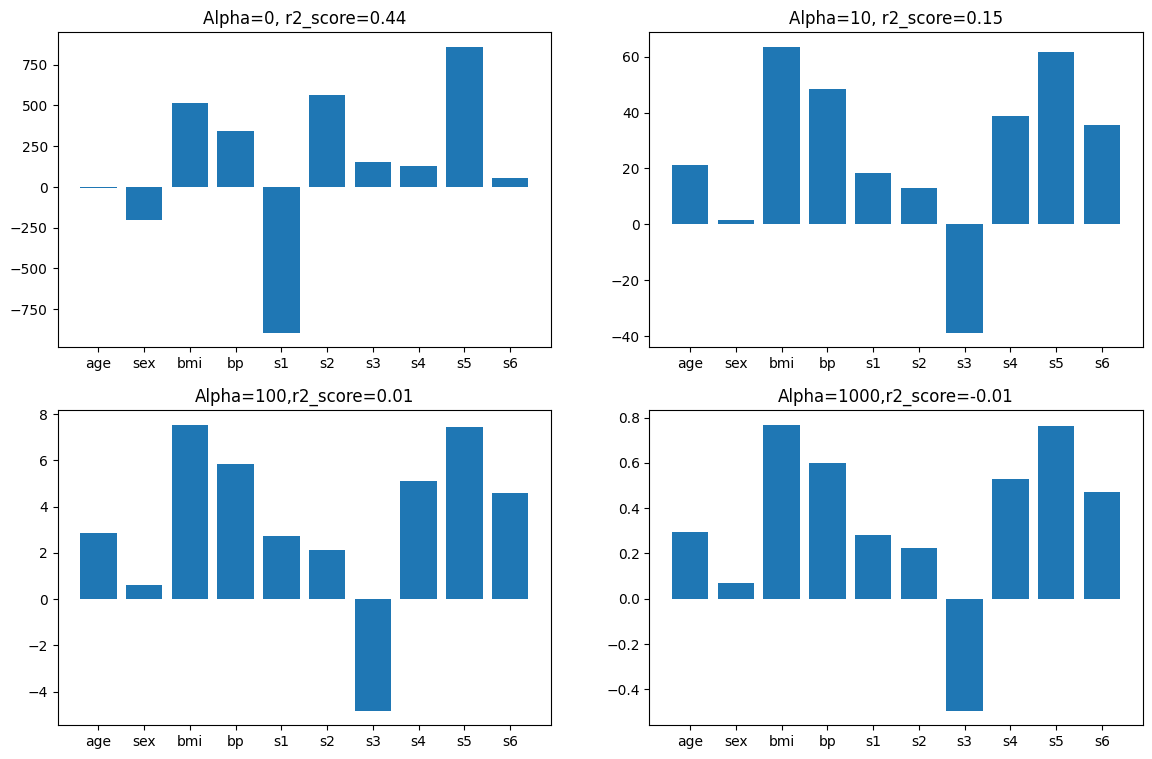

In [223]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha=0, r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha=10, r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha=100,r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha=1000,r2_score={}'.format(round(r2_scores[3],2))) 

plt.show()

# 2. Higher coefficients are affected more

Higher coefficients are penalized more strongly by Ridge Regression, so they shrink faster than smaller ones as **λ (lambda)** increases.


In [224]:
alphas = [0,0.001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []
for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_.tolist())

In [225]:
input_array = np.array(coefs)

In [226]:
coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.001,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.001,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.010,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.100,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [227]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []
for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)
    coefs.append(reg.coef_.tolist())

In [228]:
input_array = np.array(coefs).T

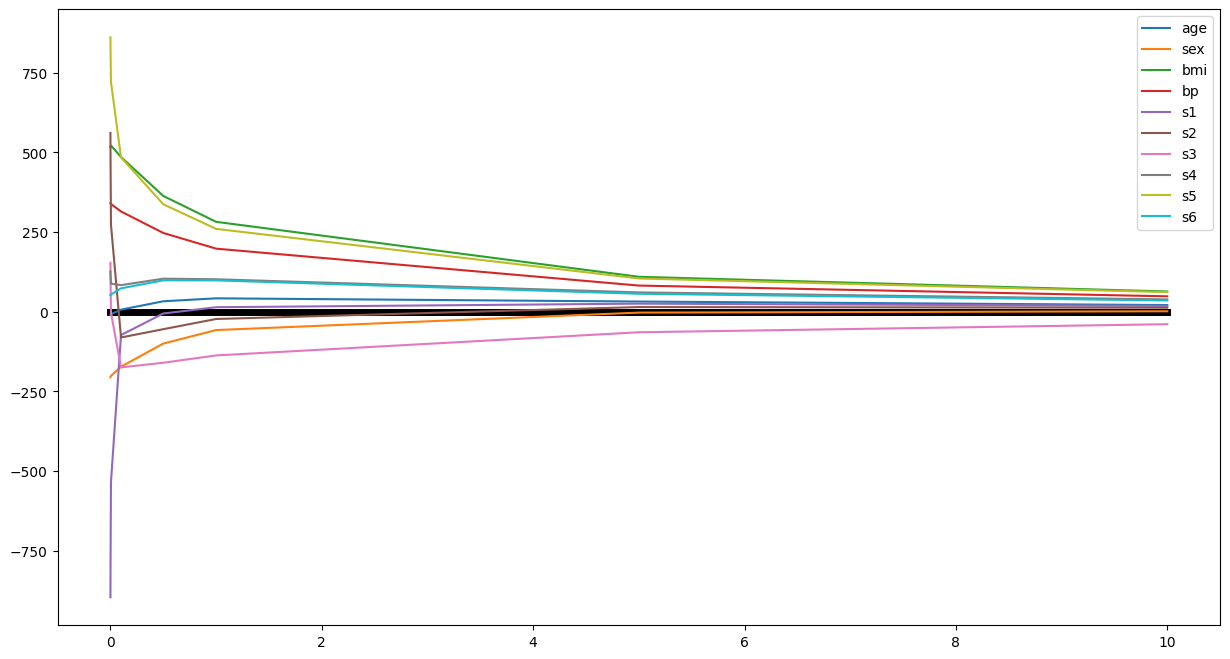

In [229]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)), color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i],label=data.feature_names[i])

plt.legend()

# 3. Bias Variance Tradeoff

### Techniques to Improve Bias-Variance Tradeoff

There are three popular techniques to balance bias and variance in machine learning models:

1. **Regularization**  
   Adds a penalty to model complexity (e.g., Ridge, Lasso) to reduce overfitting.

2. **Increasing Training Data**  
   More data helps the model generalize better, reducing variance.

3. **Feature Selection / Dimensionality Reduction**  
   Removing irrelevant or noisy features helps simplify the model and reduce overfitting.


### Bias-Variance Tradeoff in Regularization

Regularization techniques like Ridge Regression add a penalty to large coefficients to simplify the model.

- **As the regularization parameter (λ) increases:**
  - **Bias increases:** The model becomes simpler and may underfit.
  - **Variance decreases:** The model is less sensitive to training data noise, reducing overfitting.

Finding the right λ balances this tradeoff to achieve better generalization.


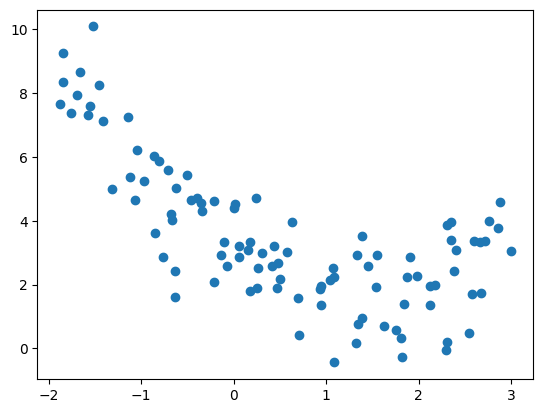

In [230]:
m = 100
X = 5*np.random.rand(m,1) - 2
y = 0.7*X**2 - 2*X + 3 + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1), y.reshape(100), test_size=0.2, random_state=2)

In [232]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [233]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace (0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss = 'mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

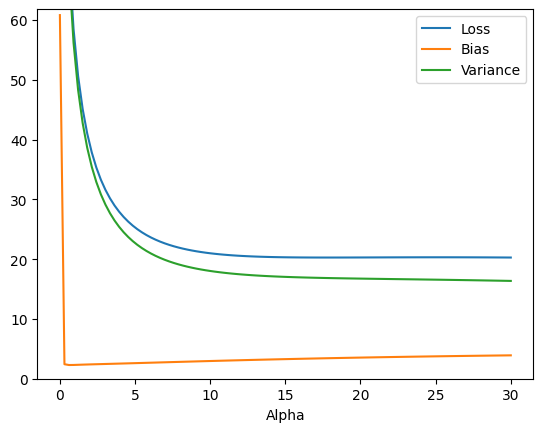

In [234]:
plt.plot(alphas, loss, label='Loss')
plt.plot(alphas, bias, label='Bias')
plt.plot(alphas, variance, label='Variance')
plt.ylim(0,max(bias)+1)
plt.xlabel('Alpha')
plt.legend()
plt.show()

# 4. Effect of regularization on loss function


- As **λ increases**, the penalty term **λ * Σ(wᵢ²)** increases.
- This makes the total **loss function increase**, even if MSE stays the same or decreases.
- Therefore, **loss increases with increasing λ** due to the added regularization penalty.


[27.82809103]
-2.294744558676981


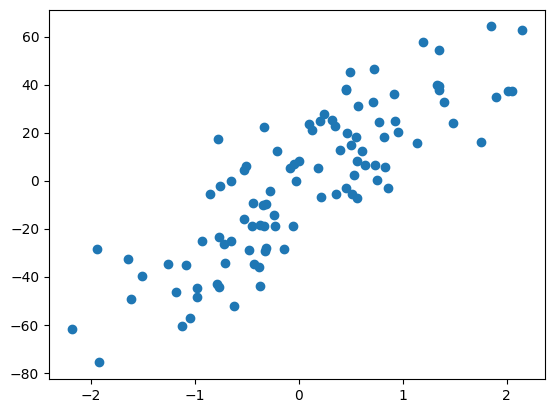

In [235]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1,n_informative=1, n_targets=1, noise=20, random_state=13)

plt.scatter(X, y)
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

In [236]:
def cal_loss(m, alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [237]:
def predict(m):
    return m*X - 2.29

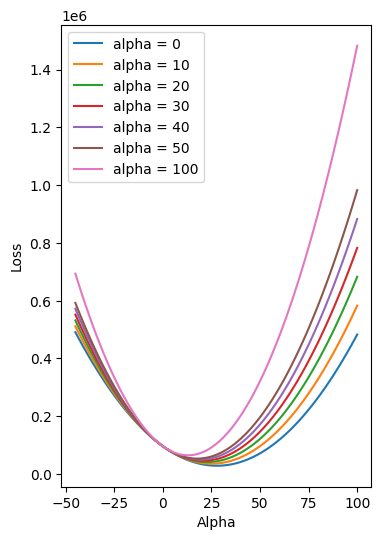

In [238]:
m = np.linspace(-45, 100, 100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)

    plt.plot(m, loss, label='alpha = {}'.format(j))

plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

# 5. Why called ridge? 

The term **"Ridge"** comes from the shape of the constraint imposed on the coefficients.

- Ridge Regression adds an **L2 penalty**: it minimizes the sum of squared coefficients.
- This constraint forms a **ridge-shaped** region (a circular or elliptical contour) in the parameter space.
- The solution is found where the **elliptical contours of the loss function** intersect with the **L2 penalty constraint**.

In contrast to Lasso (which forms a diamond-shaped constraint using L1 norm), Ridge’s constraint surface looks like a **ridge** — hence the name!
